# Multi Membership Data with Outliers

In [237]:
import sys
sys.path.append("../RTKM")
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.io import arff


# Yeast Plust Noise

Add ~10% noise to the dataset; either normal or random noise. 

In [238]:
data = arff.loadarff('datasets/yeast/yeast.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-14], dtype = float)
labels = np.array(array[:, -14:], dtype = float)

# Create 10% noise
n,m = data.shape
num_out = 150
k=14

avg_feat_vals = np.average(data, axis = 0)
std_feat_vals = np.std(data, axis =0)

outlier_dat = np.zeros((num_out,m))

for i in range(num_out):
    #Choose between random or normal noise
    outlier_dat[i,:] = avg_feat_vals + np.random.rand(m)*3*std_feat_vals
#     outlier_dat[i,:] = np.random.normal(0, 1, m)*.6
    
data_out = np.vstack((data, outlier_dat))


label_col = np.zeros((n+num_out,1))
label_col[-num_out:] = 1

labels_out = np.vstack((labels, np.zeros((num_out,k))) )

labels_out = np.hstack((labels_out, label_col))

#indices of true outliers
true_out = np.arange(1500,1650)
true_labels = labels_out
data = data_out
print(data.shape)

data = data.T
print(data.shape)

(2567, 103)
(103, 2567)


In [239]:
#### Data for latest figures ####
data = np.load('datasets/yeast_noise/data_yeast_noise.npy')
true_labels = np.load('datasets/yeast_noise/labels_yeast_noise.npy')

# data = np.load('datasets/yeast_gaussian_noise/data_yeast_gaussian_noise.npy')
# true_labels = np.load('datasets/yeast_gaussian_noise/labels_yeast_gaussian_noise.npy')

true_out = np.arange(2417,2567)
data.shape

(103, 2567)

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

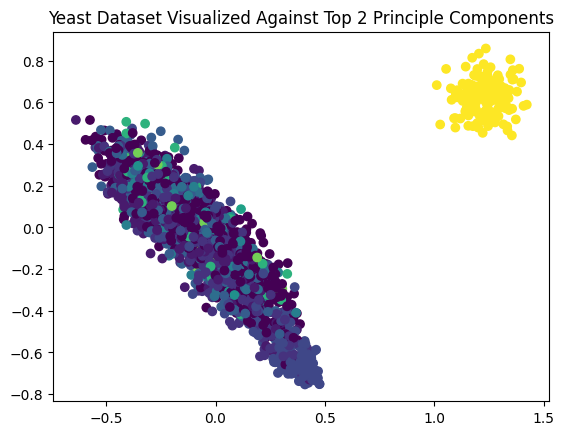

In [240]:
pca = PCA(n_components=2)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:], c = np.argmax(true_labels, axis = 1))
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')



# Run RTKM

Iteration 100
Iteration 200
Iteration 300
Iteration 400
PALM reached maximum number of iterations


 Number of true positives:  [293, 494, 584, 357, 331, 234, 88, 201, 0, 0, 0, 959, 801, 1, 0] 

 Number of false positives :  [503, 520, 525, 446, 635, 512, 403, 767, 150, 150, 150, 368, 260, 290, 154] 

 Number of true negatives:  [1302, 1009, 1059, 1259, 1210, 1458, 1736, 1320, 2239, 2164, 2128, 383, 508, 2243, 2263] 

 Number of false negatives:  [469, 544, 399, 505, 391, 363, 340, 279, 178, 253, 289, 857, 998, 33, 150] 

 F1 scores for each cluster:  [0.37612323 0.48148148 0.5583174  0.42882883 0.39218009 0.34847357
 0.19151251 0.27762431 0.         0.         0.         0.61024499
 0.56013986 0.00615385 0.        ] 

 Average F1 score:  0.2820720082949928 

 me score: 1.002027766968329


Text(0.5, 1.0, 'Robust Trimmed k Means')

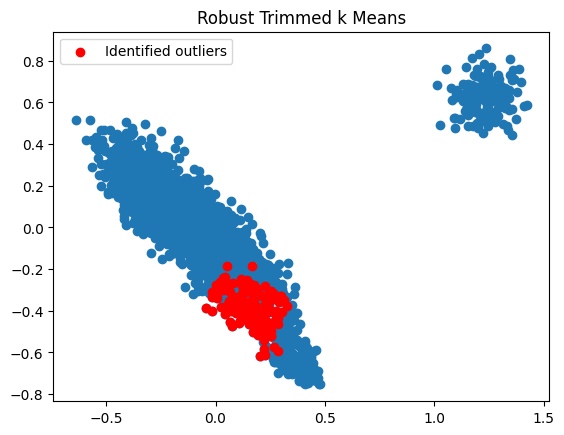

In [241]:
m,n = data.shape
k = 14

RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0.06, max_iter =400, num_members = 4, init_centers = None) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = RTKM_yeast.weights, pred_outliers = RTKM_yeast.outliers, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')


In [242]:
pred_clusters.shape

(2567,)

In [243]:
pred_outliers.shape

(154,)